In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
mall_df = pd.read_excel("C:/Users/gertr/Desktop/DATA ANALYTICS/PERSONAL PROJECTS/CLUSTERING(WINE)/Mall_Customers.xlsx")

In [3]:
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall_df.shape

(200, 5)

In [5]:
mall_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
## Check for duplicates
mall_df.duplicated().sum()

0

In [7]:
## rename Genre as Gender
mall_df.rename(columns={'Genre':'Gender'}, inplace=True)

In [8]:
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# UNIVARIATE ANALYSIS

In [9]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


###### From the above statistics, we can tell that annual income and spending score has somewhat of a normal distribution since its mean and median are really close.

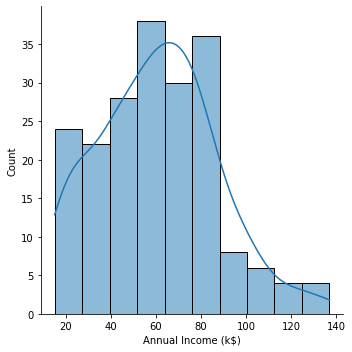

In [10]:
sns.displot(mall_df['Annual Income (k$)'],kde=True);

#### In order to visualize the distribution of all the other numeric variables, a for loop will be efficient since it allows to go through each item in a list or any kind of structure.

In [11]:
### To easily copy and paste the columns needed for the loop below
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

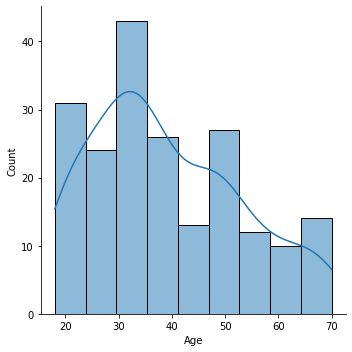

<Figure size 432x288 with 0 Axes>

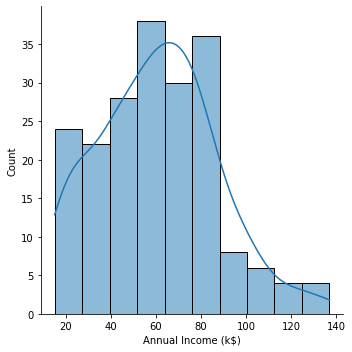

<Figure size 432x288 with 0 Axes>

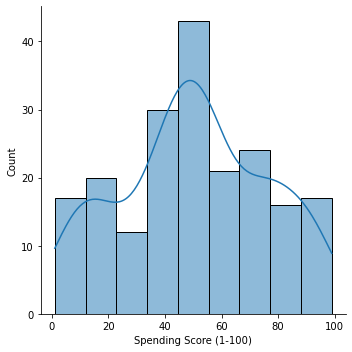

In [12]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:   ## For each item/feature in the column variable created,
    plt.figure()    ## create a new figure for each feature when
    sns.displot(mall_df[i],kde=True);   ## a plot is run

#### However, a stand alone kdeplot allows for a better understanding of the data especially with the additional dimension of gender. In other words. a kdeplot allows for a better understanding /distribution of the data based on gender

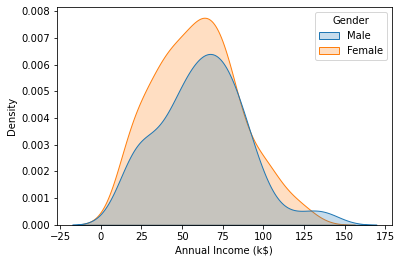

In [13]:
sns.kdeplot(mall_df['Annual Income (k$)'], shade=True,hue=mall_df['Gender']);

#### To analyze a kdeplot for all variables, a for loop will be ideal

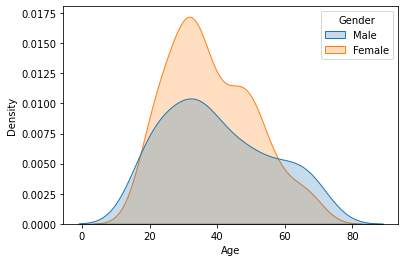

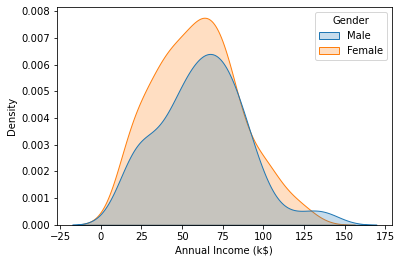

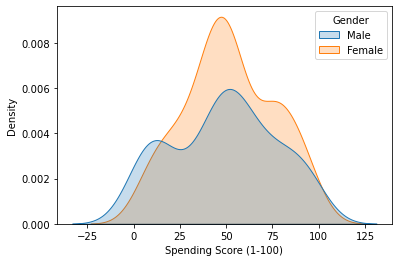

In [14]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:   ## For each item/feature in the column variable created,
    plt.figure()    ## create a new figure for each feature when
    sns.kdeplot(mall_df[i], shade=True,hue=mall_df['Gender']);

#### From the above kdeplots, the distribution of each feature for each gender can clearly be identified. Females have more frequency for each feature.

In [15]:
mall_df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [16]:
## To know the mean of each features between the genders
mall_df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


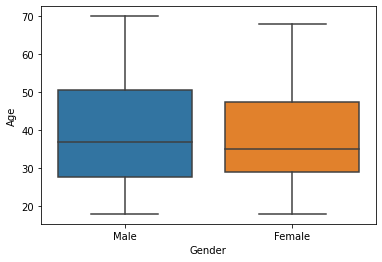

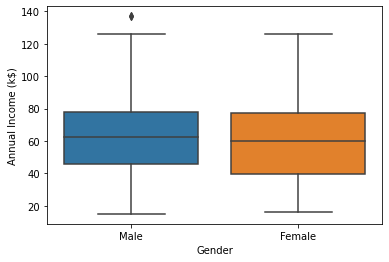

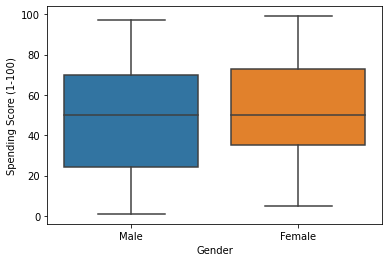

In [17]:
### A boxplot can be used to dive deeper to check for outliers and gives an idea of the percentiles that the data is concentrated between
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:   ## For each item/feature in the column variable created,
    plt.figure()    ## create a new figure for each feature when
    sns.boxplot(data=mall_df, x='Gender',y=mall_df[i]);

# BIVARIATE ANALYSIS

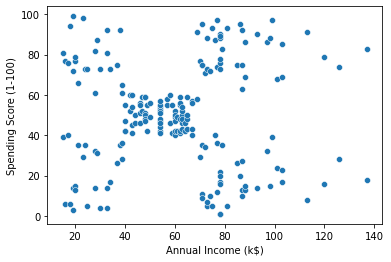

In [18]:
sns.scatterplot(data=mall_df, x='Annual Income (k$)', y= 'Spending Score (1-100)');

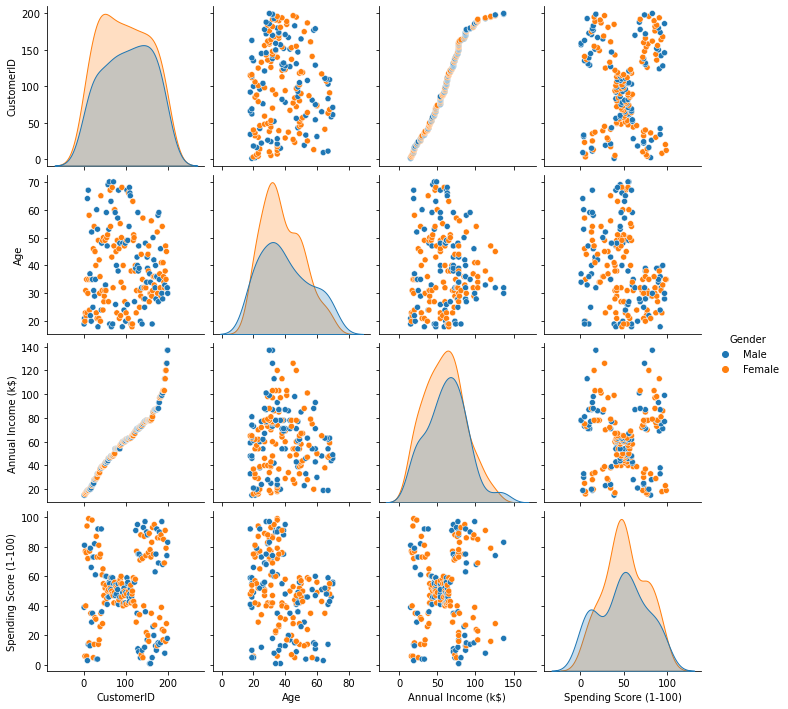

In [19]:
### To view the relationship amongst the variables, a pairplot is best used
mall_df.drop('CustomerID',axis=1)
sns.pairplot(mall_df,hue='Gender')

In [20]:
## To find the degree of the relationship amongst the variables, a correlation funstion is used
mall_df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

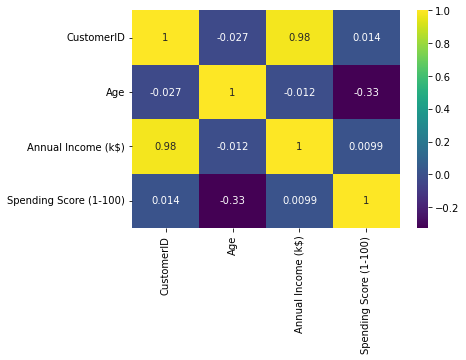

In [21]:
## A heatmap is used to visualize the degree of correlation
sns.heatmap(mall_df.corr(), annot=True,cmap='viridis')

In [22]:
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# CLUSTERING - UNIVARIATE, BIVARIATE AND MULTIVARIATE

##### For any machine learning algorithm in sklearn to be done, there are three steps
##### The first thing is to initialize  the algorithm
##### The second is to fit our data to that algorithm which allows the algorithm to learn the data
##### The third is to either predict or gather the necessary labels needed out of that fitted model

## UNIVARIATE CLUSTERING (Annual Income)

In [23]:
## Here we perform the first step by initializing the KMeans algorithm
clustering1 = KMeans() ## The standard parameters for clusters in this algorithm is 8.

In [24]:
## Here we fit the feature that we want the algorith,KMeans, to learn
clustering1.fit(mall_df[['Annual Income (k$)']])

KMeans()

In [25]:
### A lst of the labels. which we already know are 8 since the default cluster is 8
clustering1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3,
       3, 3])

In [26]:
### Now we need to compare these labels to our initial data so we can make meaning out of it
mall_df['Income Cluster']=clustering1.labels_
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,3
197,198,Male,32,126,74,3
198,199,Male,32,137,18,3


In [27]:
## Now we can do some summary statistics on the clusters
# 1. the number of customers in each cluster
mall_df['Income Cluster'].value_counts()

5    42
2    36
4    30
1    28
6    28
0    16
7    14
3     6
Name: Income Cluster, dtype: int64

##   ELBOW METHOD
#### Rather than using a default clustering number, the elbow method can help us in identifying the optimal number of clusters to choose. This can be done by selecting the right inertia(WCSS)

In [28]:
## To efficient way to check the inertia(WCSS) on ach cluster is to create a for loop
inertia_scores=[]    ## create an empty list to put all the inertia scores in once calculated
for i in range(1,11):   ## For each cluster in a range of 1 to 10,
    kmeans=KMeans(n_clusters=i) ### Initialize the algorithm
    kmeans.fit(mall_df[['Annual Income (k$)']])  ## Fit the data to be studied by the algorithm
    inertia_scores.append(kmeans.inertia_)     ### append the calculated WCSS to inertia scores that was created
    


In [29]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3941.4163614163617,
 2831.2960317460324,
 2173.287445887446,
 1780.430554412908]

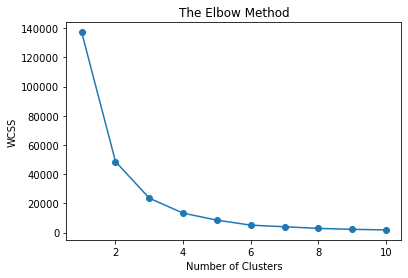

In [30]:
### We need to pair the inertia scores with their respective clusters
plt.plot(range(1,11), inertia_scores, marker='o')
plt.title('The Elbow Method')
plt.ylabel("WCSS")
plt.xlabel('Number of Clusters')
plt.show()

### KNEELOCATOR

In [31]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [32]:
#### In case we are unsure about the exact number from the elbow method, the KneeLocater function from the Kneed Library can help.
from kneed import KneeLocator

k1=KneeLocator(range(1,11), inertia_scores, curve='convex', direction='decreasing')
k1.elbow

3

In [33]:
## With our chosen cluster, we can input it into the KMeans algorithm
kmeans1=KMeans(n_clusters=3) ## initialize algorithm with optimal clusters
kmeans1.fit(mall_df[['Annual Income (k$)']])
kmeans1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [34]:
mall_df['Income Cluster']=kmeans1.labels_
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [35]:
mall_df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [36]:
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [37]:
## We can now check the mean for each feature in each cluster
mall_df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


## BIVARIATE CLUSTERING (Annual Income & Spending Score)

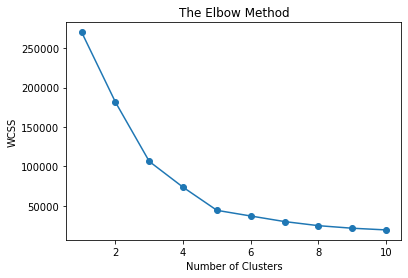

In [38]:
inertia_scores2=[]    ## create an empty list to put all the inertia scores in once calculated
for i in range(1,11):   ## For each cluster in a range of 1 to 10,
    kmeans2=KMeans(n_clusters=i) ### Initialize the algorithm
    kmeans2.fit(mall_df[['Annual Income (k$)','Spending Score (1-100)']])  ## Fit the data to be studied by the algorithm
    inertia_scores2.append(kmeans2.inertia_)     ### append the calculated WCSS to inertia scores that was created
    
plt.plot(range(1,11), inertia_scores2, marker='o')
plt.title('The Elbow Method')
plt.ylabel("WCSS")
plt.xlabel('Number of Clusters')
plt.show()


In [39]:
k2=KneeLocator(range(1,11), inertia_scores2, curve='convex', direction='decreasing')
k2.elbow

5

In [40]:
## With our chosen cluster, we can input it into the KMeans algorithm
kmeans2=KMeans(n_clusters=5) ## initialize algorithm with optimal clusters
kmeans2.fit(mall_df[['Annual Income (k$)','Spending Score (1-100)']])
mall_df['Income & Spending Cluster']=kmeans2.labels_
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income & Spending Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,1,3
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,1,3


In [41]:
## We can get the centriods for each cluster with the 'cluster_centers_'function. The results are the x and y cordinates
kmeans2.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [42]:
## In order to add the centriods into a scatter plot, we first make it a dataframe
centers=pd.DataFrame(kmeans2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,86.538462,82.128205
1,26.304348,20.913043
2,55.296296,49.518519
3,88.200000,17.114286
4,25.727273,79.363636


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

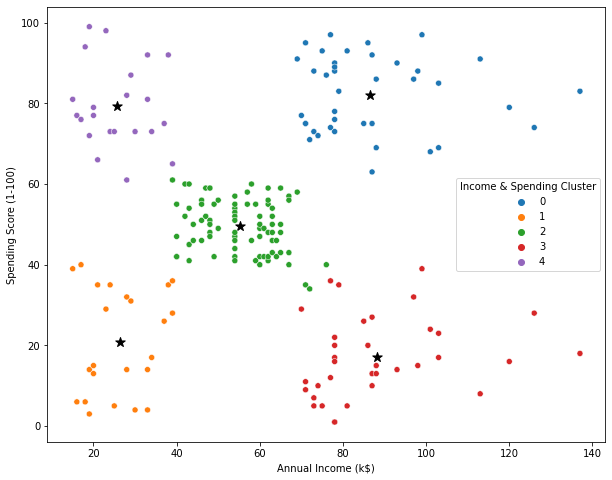

In [43]:
### Visualize to better understand clustering result
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'], s=100, c='black',marker='*')
sns.scatterplot(data=mall_df, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Income & Spending Cluster',palette='tab10')

In [44]:
## For further analysis, we can use a crosstab to breakdown results into male and female
pd.crosstab(mall_df['Income & Spending Cluster'],mall_df['Gender'],normalize='index')

Gender,Female,Male
Income & Spending Cluster,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.592593,0.407407
3,0.457143,0.542857
4,0.590909,0.409091


In [45]:
mall_df.groupby('Income & Spending Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income & Spending Cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,42.716049,55.296296,49.518519
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


#### From the above, we can say that the for our target group which is the orange cluster(cluster 1) are those with high annual income and high spending score. And this cluster has a higher percentage of females(53%).We can also say that in this cluster,the average age is 32, average income is 86 thousand and average spending score is 82

## MULTIVARIATE CLUSTERING

In [46]:
## From the data frame, we would need to encode Gender by replacing them with numbers. This allows to easily feed it into the ML algorithm
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income & Spending Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1


In [47]:
## replace the Gender feature with dummy variables through one hot encoding
mall_df2 = pd.get_dummies(mall_df)
mall_df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income & Spending Cluster,Gender_Female,Gender_Male
0,1,19,15,39,0,1,0,1
1,2,21,15,81,0,4,0,1
2,3,20,16,6,0,1,1,0
3,4,23,16,77,0,4,1,0
4,5,31,17,40,0,1,1,0
...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,1,0
196,197,45,126,28,1,3,1,0
197,198,32,126,74,1,0,0,1
198,199,32,137,18,1,3,0,1


In [48]:
### One of the dummy variables can be dropped since we can infer if its male or female from only one dummy
mall_df2 = pd.get_dummies(mall_df,drop_first=True)
mall_df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income & Spending Cluster,Gender_Male
0,1,19,15,39,0,1,1
1,2,21,15,81,0,4,1
2,3,20,16,6,0,1,0
3,4,23,16,77,0,4,0
4,5,31,17,40,0,1,0
...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0
196,197,45,126,28,1,3,0
197,198,32,126,74,1,0,1
198,199,32,137,18,1,3,1


In [49]:
mall_df2.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Income & Spending Cluster', 'Gender_Male'],
      dtype='object')

In [50]:
mall_df2=mall_df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
mall_df2               

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [51]:
### the variables need to be standardized so that the algorithm puts them on the same scale
from sklearn.preprocessing import StandardScaler

In [52]:
scale=StandardScaler()   ### Initialize

In [53]:
mall_df2 = pd.DataFrame(scale.fit_transform(mall_df2))    ## fit the data to be studied by the algorithm
mall_df2.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


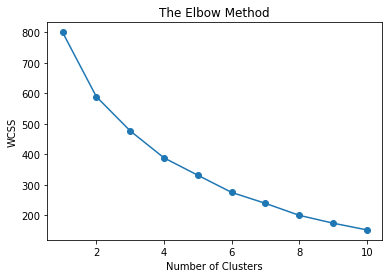

In [54]:
## Now we can go through the clustering process for multiple features
inertia_scores3=[]    ## create an empty list to put all the inertia scores in once calculated
for i in range(1,11):   ## For each cluster in a range of 1 to 10,
    kmeans3=KMeans(n_clusters=i) ### Initialize the algorithm
    kmeans3.fit(mall_df2)  ## Fit the data to be studied by the algorithm
    inertia_scores3.append(kmeans3.inertia_)     ### append the calculated WCSS to inertia scores that was created
    
plt.plot(range(1,11), inertia_scores3, marker='o')
plt.title('The Elbow Method')
plt.ylabel("WCSS")
plt.xlabel('Number of Clusters')
plt.show()

In [55]:
## With our chosen cluster, we can input it into the KMeans algorithm
kmeans3=KMeans(n_clusters=4) ## initialize algorithm with optimal clusters
kmeans3.fit(mall_df2)
mall_df2['Cluster Label']=kmeans3.labels_
mall_df2

,0,1,2,3,Cluster Label
0,-1.424569,-1.738999,-0.434801,1.128152,2
1,-1.281035,-1.738999,1.195704,1.128152,2
2,-1.352802,-1.700830,-1.715913,-0.886405,0
3,-1.137502,-1.700830,1.040418,-0.886405,1
4,-0.563369,-1.662660,-0.395980,-0.886405,1
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405,1
196,0.441365,2.497807,-0.861839,-0.886405,0
197,-0.491602,2.497807,0.923953,1.128152,2
198,-0.491602,2.917671,-1.250054,1.128152,3
